In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Computational Exercise 4: Path Integrals and Numerical Integration

You saw in Tutorial 4 that electric potential is path-independent: no matter how you integrate between two points, the potential difference will be the same as long as the points and electric field stay the same. For this exercise, we'll be using the same setup as in Part 3 of that Tutorial: an E-field of the form $\mathbf{E} = y \hat{x} + x \hat{y}$. As you saw in that tutorial, this vector field looks like:

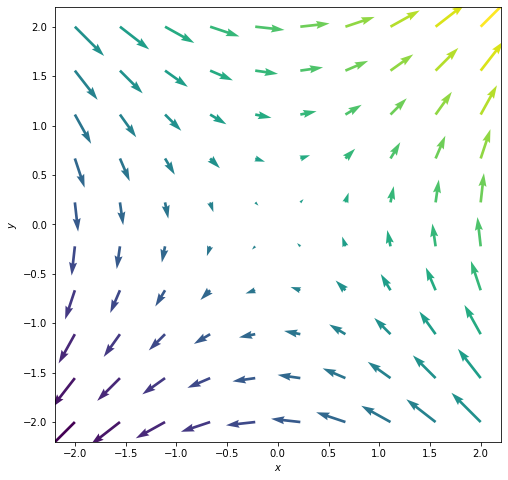

In [2]:
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)

X, Y = np.meshgrid(x, y)
Z = X+Y

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.quiver(X, Y, Y, X, Z)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.show()

You also found that the potential difference between two points using two different paths was the same, as seen below. Since we're using python, we'll define these two points as $(1, 2)$ and $(4, 6)$, rather than working symbolically. If you're unconvinced, feel free to change these points and see what happens!

Path 1 potential difference is -22, path 2 potential difference is -22.


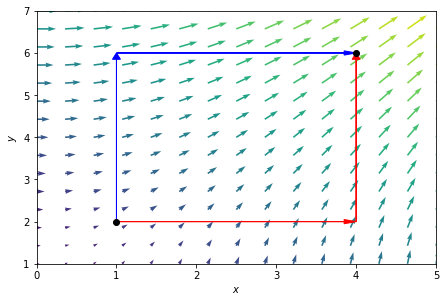

In [3]:
p1 = (1, 2)
p2 = (4, 6)

###Path 1 (red) is a segment from x1 to x2 at y1 followed by a 
###   segment from y1 to y2 at x2

path1 = -(p2[0]*p1[1] - p1[0]*p1[1] + p2[0]*p2[1] - p2[0]*p1[1])

###Path 2 (blue) is a segment from y1 to y2 at x1 followed by a 
###   segment from x1 to x2 at y2

path2 = -(p1[0]*p2[1] - p1[0]*p1[1] + p2[0]*p2[1] - p1[0]*p2[1])

print("Path 1 potential difference is {}, path 2 potential \
difference is {}.".format(path1, path2))

#Make quiver plot for plotting
x = np.linspace(p1[0]-1, p2[0]+1, 15)
y = np.linspace(p1[1]-1, p2[1]+1, 15)

X, Y = np.meshgrid(x, y)
Z = X+Y

fig = plt.figure()
ax = fig.add_subplot(111)
ax.quiver(X, Y, Y, X, Z)

#Make points for p1 and p2
plt.scatter(*p1, c='black', zorder=10)
plt.scatter(*p2, c='black', zorder=10)

#Add path 1 arrows
ax.arrow(*p1, p2[0]-p1[0], 0, color='r', shape='full', 
         length_includes_head=True, head_width=.1)
ax.arrow(p2[0], p1[1], 0, p2[1]-p1[1], color='r', shape='full', 
         length_includes_head=True, head_width=.1)

#Add path 2 arrows
ax.arrow(*p1, 0, p2[1]-p1[1], color='b', shape='full', 
         length_includes_head=True, head_width=.1)
ax.arrow(p1[0], p2[1], p2[0]-p1[0], 0, color='b', shape='full', 
         length_includes_head=True, head_width=.1)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(p1[0]-1, p2[0]+1)
ax.set_ylim(p1[1]-1, p2[1]+1)

fig.tight_layout(pad=0)
plt.show()

This works well, but it doesn't tell us how path integrals really work. For this exercise, we'll be building a path integral function that lets you integrate over any path between two points. We're going to rely on a very simple method for integration, much like a Riemann sum, but with vectors. The basic parts of this are:
* A function that returns the electric field vector at each point (this is given)
* A function which returns the potential difference between two given points, using vector calculations
* Code that iterates through a path and sums the differences

First, we've included a function that gives you the electric field vector at any given point. You don't need to change this at all, but you're welcome to if you want to experiment with different electric fields.

This function returns what is known as a <code>tuple</code>, which you'll be working with a lot here. A tuple is much like a list, as both are ordered lists of objects. The difference is tuples cannot be changed, which makes them great for coordinate points or vectors. You can see this difference as tuples are generated with parentheses (as in the cell below), while lists use square brackets.

In [4]:
def E(pt):
    """This function returns the Electric field vector at a given
        point, a tuple of the form (x, y)"""
    Ex = pt[1]
    Ey = pt[0]
    return (Ex, Ey)

# a) Calculate the potential difference

Next, we need the function for finding potential differences. The basic scaffolding is laid out for you, but you will need to edit the lines to include correct calculations. The function should take as input start and end points and return the potential difference between those two points. 

As a reminder, Griffiths Equation 1.22 is $V(\mathbf{b}) - V(\mathbf{a}) = -\int_{a}^{b} \mathbf{E} \cdot d\mathbf{l}$

Some functions and tips that may come in handy:
* np.subtract(a, b) lets you subtract $b$ from $a$ ($a - b$) with two arrays or vectors, element-wise. For example if $a = (4, 3)$ and $b = (2, 0)$, np.subtract(a, b) equals $(2, 3)$
* np.dot(a, b) gives you the dot product of $a$ and $b$

*Something to think about:* When calculating the E-field, should you calculate it at point $a$, point $b$, or find both field strengths and average them? How does that difference change things, and does it matter?

In [5]:
def V(a, b):
    """This function returns the potential difference between two
    points a and b, which are both tuples"""
    sep = 1 #The separation vector between pt a and b
    e = 1 #The E-field
    v = 1 #The potential difference between a and b
    return v

# b) Numerically integrate the potential differences

Now, to approximate the integral, we need to make the difference between points $a$ and $b$ very small and sum over each section with a for loop. If we were to make the distance between the points infinitely small (the resolution infinite), it would exactly equal the integral.

_Things to try:_

    *You may want to try changing the resolution of this numerical integration by changing the number of steps in the integration (*res*).
    
    *You may also try integrating over a different path by altering the calculation for *y_arr*.

The potential difference over the path is 0.00


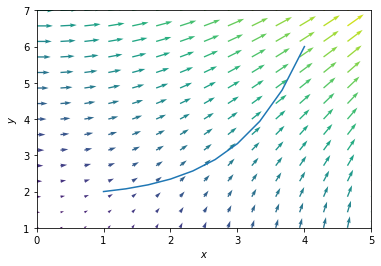

In [6]:
res = 10 #Try changing the resolution and see how it changes the results!

#Make a nice curve with res points between p1 and p2 defined above
x_arr  = np.linspace(p1[0], p2[0], res)
a = (p2[1] - p1[1])/(np.cosh(p2[0]) - np.cosh(p1[0]))
b = p1[1] - a*np.cosh(p1[0])
y_arr = a*np.cosh(x_arr) + b

v = 0 #Initialize the potential along the path

###YOUR CODE TO SUM OVER THE LINE HERE
### This code should calculate the full potential, v, along the path
### by integrating over the potential differences between each points in your arrays

fig = plt.figure()
ax = fig.add_subplot(111)
ax.quiver(X, Y, Y, X, Z)

plt.plot(x_arr, y_arr)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(p1[0]-1, p2[0]+1)
ax.set_ylim(p1[1]-1, p2[1]+1)
    
    
print("The potential difference over the path is {:.2f}".format(v))

# c) Analysis of your results
In the cell below, compare your calculation for the potential difference between points $a$ and $b$ to your answer from Tutorial 4, part 3 (feel free to check the solutions if you didn't finish the tutorial). Do you find reasonable convergence? What resolution did you feel was sufficient?